<img src="./images/banner.png" width="800">

# Estimator API

The Estimator API is the cornerstone of scikit-learn's design philosophy, providing a consistent and intuitive interface for all machine learning algorithms implemented in the library. This uniformity is one of scikit-learn's greatest strengths, allowing users to easily switch between different algorithms without having to learn entirely new syntax. The Estimator API defines a common interface for all machine learning models in scikit-learn, simplifying the process of building, training, and using these models.


An Estimator in scikit-learn is any object that learns from data. This includes:

- Supervised learning algorithms (e.g., linear regression, random forests)
- Unsupervised learning algorithms (e.g., k-means clustering, PCA)
- Feature extraction methods (e.g., vectorizers)
- Feature selection tools


Estimators are designed to be used as building blocks in more complex machine learning workflows, often combined using tools like Pipeline.


All estimators in scikit-learn adhere to a specific contract, which defines their behavior and ensures consistency across different implementations. This contract includes:

1. Initialization with hyperparameters
2. Learning from data using the `fit()` method
3. Making predictions or transforming data using methods like `predict()`, `transform()`, or `fit_transform()`


<img src="./images/fit.png" width="800">

Understanding the Estimator API is crucial for effectively using scikit-learn. It allows you to:

1. Quickly adapt to new algorithms and tools within the library
2. Build modular and reusable machine learning pipelines
3. Leverage scikit-learn's model selection and evaluation tools consistently across different models


The typical workflow when using an Estimator follows these steps:

1. Import the necessary Estimator class
2. Instantiate the Estimator with desired hyperparameters
3. Call the `fit()` method on your training data
4. Use the fitted Estimator to make predictions or transform new data


Here's a simple example using a linear regression model:


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Scale the data
X = StandardScaler().fit_transform(X)

# Instantiate the Estimator
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

LogisticRegression()

In [2]:
# Make a prediction
predictions = model.predict(X[:30])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

💡 **Pro Tip:** Always check the documentation of specific Estimators to understand their unique parameters and methods. While the core API is consistent, individual Estimators may have additional functionality tailored to their specific algorithms.


By mastering the Estimator API, you'll be well-equipped to tackle a wide range of machine learning tasks using scikit-learn, from simple linear models to complex ensemble methods and preprocessing pipelines.

**Table of contents**<a id='toc0_'></a>    
- [Core Components of the Estimator Interface](#toc1_)    
  - [Hyperparameters](#toc1_1_)    
  - [Learned Parameters](#toc1_2_)    
  - [Methods](#toc1_3_)    
  - [Attributes](#toc1_4_)    
  - [Example: Putting It All Together](#toc1_5_)    
- [Architecture of BaseEstimator and Derived Classes](#toc2_)    
  - [BaseEstimator: The Foundation](#toc2_1_)    
  - [Mixin Classes: Adding Specific Behaviors](#toc2_2_)    
  - [Implementing a Custom Estimator with Mixins](#toc2_3_)    
  - [The Benefits of This Architecture](#toc2_4_)    
  - [Meta-Estimators and Composite Estimators](#toc2_5_)    
- [Common Methods in Estimators](#toc3_)    
  - [The `fit()` Method](#toc3_1_)    
  - [The `predict()` Method](#toc3_2_)    
  - [The `transform()` Method](#toc3_3_)    
  - [The `fit_transform()` Method](#toc3_4_)    
  - [The `score()` Method](#toc3_5_)    
  - [Putting It All Together](#toc3_6_)    
- [Types of Estimators](#toc4_)    
  - [Supervised Learning Estimators](#toc4_1_)    
    - [Classifiers](#toc4_1_1_)    
    - [Regressors](#toc4_1_2_)    
  - [Unsupervised Learning Estimators](#toc4_2_)    
    - [Clustering Algorithms](#toc4_2_1_)    
    - [Dimensionality Reduction](#toc4_2_2_)    
  - [Transformer Estimators](#toc4_3_)    
    - [Preprocessors](#toc4_3_1_)    
    - [Feature Selection](#toc4_3_2_)    
  - [Meta-Estimators](#toc4_4_)    
- [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Core Components of the Estimator Interface](#toc0_)

The Estimator interface in scikit-learn is designed to provide a consistent and intuitive way to interact with machine learning models. Understanding its core components is essential for effectively using the library and building robust machine learning pipelines.


The Estimator interface consists of several key components that work together to provide a unified API for all scikit-learn models.


### <a id='toc1_1_'></a>[Hyperparameters](#toc0_)


Hyperparameters are the configurable aspects of an Estimator that are set before the learning process begins. They control the behavior of the learning algorithm and can significantly impact model performance.

- Hyperparameters are passed as arguments when instantiating an Estimator.
- They are typically stored as public attributes of the Estimator object.
- Examples include `n_neighbors` for KNN, `C` for SVM, or `max_depth` for decision trees.


In [3]:
from sklearn.linear_model import LogisticRegression

# Instantiating with hyperparameters
model = LogisticRegression(C=1.0, penalty='l1')

### <a id='toc1_2_'></a>[Learned Parameters](#toc0_)


Learned parameters, also known as model parameters, are the values that the Estimator learns from the data during the fitting process.

- These parameters are typically denoted with a trailing underscore (e.g., `coef_`, `intercept_`).
- They are only available after calling the `fit()` method.
- Examples include the coefficients in linear regression or the split points in a decision tree.


In [4]:
X, y = load_iris(as_frame=True, return_X_y=True)

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [5]:
print(f"Coefficient: {model.coef_}")

Coefficient: [[-0.42297784  0.96737285 -2.51559259 -1.08055747]
 [ 0.53460191 -0.32246744 -0.20680669 -0.94445271]
 [-0.11162407 -0.64490541  2.72239928  2.02501018]]


In [6]:
print(f"Intercept: {model.intercept_}")

Intercept: [  9.84293639   2.23994242 -12.08287881]


### <a id='toc1_3_'></a>[Methods](#toc0_)


The Estimator interface defines several key methods that are implemented by all estimators:

1. **`fit(X, y=None)`**: This method trains the model using the provided data.
   - `X`: The input features
   - `y`: The target values (optional for unsupervised learning)

2. **`predict(X)`**: For supervised learning, this method makes predictions for new data.

3. **`transform(X)`**: For feature selection or dimensionality reduction, this method transforms the input data.

4. **`fit_transform(X, y=None)`**: A convenience method that fits to the data, then transforms it.

5. **`score(X, y)`**: Returns a default evaluation score for the model.

💡 **Pro Tip:** Not all methods are applicable to every Estimator. For example, unsupervised learning algorithms like PCA don't have a `predict()` method.


### <a id='toc1_4_'></a>[Attributes](#toc0_)


Estimators have various attributes that provide information about the model:

- **Hyperparameter attributes**: Set during initialization (e.g., `knn.n_neighbors`)
- **Learned parameter attributes**: Available after fitting (e.g., `linear_model.coef_`)
- **Metadata attributes**: Provide information about the model (e.g., `feature_names_in_`)


### <a id='toc1_5_'></a>[Example: Putting It All Together](#toc0_)


Let's look at an example that demonstrates these components working together:


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate with hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [8]:
# Make predictions
y_pred = rf.predict(X_test)


In [9]:
# Score the model
score = rf.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")


Model accuracy: 0.88


In [10]:
# Access learned parameters
print(f"Number of features: {rf.n_features_in_}")
print(f"Feature importances: {rf.feature_importances_[:5]}")

Number of features: 20
Feature importances: [0.00925633 0.12858252 0.01372829 0.00641955 0.0078288 ]


❗️ **Important Note:** Always ensure that you're using the appropriate methods and attributes for your specific Estimator. Consult the scikit-learn documentation for detailed information on each Estimator's capabilities and limitations.


By understanding these core components of the Estimator interface, you'll be well-equipped to work with a wide variety of machine learning models in scikit-learn, regardless of their specific algorithms or use cases.

## <a id='toc2_'></a>[Architecture of BaseEstimator and Derived Classes](#toc0_)

Understanding the architecture behind scikit-learn's estimators provides valuable insight into the library's design and helps explain the consistency and flexibility of its API. At the core of this architecture is the `BaseEstimator` class and a system of mixins that work together to create the diverse range of estimators available in scikit-learn.


The architecture of scikit-learn's estimators is built on a foundation of inheritance and composition, allowing for code reuse, consistency, and extensibility.


### <a id='toc2_1_'></a>[BaseEstimator: The Foundation](#toc0_)


`BaseEstimator` is the base class for all estimators in scikit-learn. It provides common functionality that all estimators share:

- Automatic get/set of parameters
- Cloning of estimators
- Setting and getting feature names


<img src="./images/base-estimator.png" width="800">

In [11]:
from sklearn.base import BaseEstimator

class MyCustomEstimator(BaseEstimator):
    def __init__(self, param1=1, param2='value'):
        self.param1 = param1
        self.param2 = param2

    def fit(self, X, y):
        # Implement fitting logic here
        return self

my_estimator = MyCustomEstimator(param1=2)
print(my_estimator.get_params())  # Automatically gets all parameters

{'param1': 2, 'param2': 'value'}


💡 **Pro Tip:** When creating custom estimators, always inherit from `BaseEstimator` to ensure compatibility with scikit-learn's ecosystem.


### <a id='toc2_2_'></a>[Mixin Classes: Adding Specific Behaviors](#toc0_)


Scikit-learn uses mixin classes to add specific behaviors to estimators. Common mixins include:

- `ClassifierMixin`: For classification algorithms
- `RegressorMixin`: For regression algorithms
- `TransformerMixin`: For data transformation algorithms
- `ClusterMixin`: For clustering algorithms


These mixins often provide default implementations of certain methods. For example, `TransformerMixin` provides a default `fit_transform()` method.


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyCustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Implement transformation logic here
        return X

# Now MyCustomTransformer has a fit_transform() method automatically

Here's an overview of `BaseEstimator` and key mixin classes, along with their primary methods:

```
BaseEstimator
│── get_params()
│── set_params()
│── __repr__()
│
├── ClassifierMixin
│   │── score()
│   └── predict_proba() [optional]
│
├── RegressorMixin
│   └── score()
│
├── TransformerMixin
│   └── fit_transform()
│
├── ClusterMixin
│   │── fit_predict()
│   └── fit_transform()
│
└── OutlierMixin
    └── fit_predict()
```

Each mixin provides specific methods:
1. **ClassifierMixin**
   - `score(X, y)`: Returns the mean accuracy on the given test data and labels
   - `predict_proba(X)`: [Optional] Returns probability estimates for samples

2. **RegressorMixin**
   - `score(X, y)`: Returns the coefficient of determination R^2 of the prediction

3. **TransformerMixin**
   - `fit_transform(X, y=None)`: Fits transformer to X and y and returns transformed version of X

4. **ClusterMixin**
   - `fit_predict(X, y=None)`: Performs clustering on X and returns cluster labels
   - `fit_transform(X, y=None)`: Fits to X, transforms X and returns transformed X

5. **OutlierMixin**
   - `fit_predict(X, y=None)`: Performs outlier detection on X and returns labels


```
                  ┌─────────────────┐
                  │  BaseEstimator  │
                  └─────────────────┘
                           ▲
                           │
           ┌───────────────┼───────────────┐
           │               │               │
  ┌────────┴────────┐ ┌────┴────┐ ┌────────┴────────┐
  │ ClassifierMixin │ │ Mixin 2 │ │ TransformerMixin│
  └────────┬────────┘ └────┬────┘ └────────┬────────┘
           │               │               │
     ┌─────┴─────┐   ┌─────┴─────┐   ┌─────┴─────┐
     │ Classifier│   │Estimator 2│   │Transformer│
     └───────────┘   └───────────┘   └───────────┘
```


This diagram illustrates how concrete estimator classes (e.g., `Classifier`, `Transformer`) inherit from both `BaseEstimator` and specific mixin classes.


### <a id='toc2_3_'></a>[Implementing a Custom Estimator with Mixins](#toc0_)

Let's create a custom classifier that utilizes both `BaseEstimator` and `ClassifierMixin`:


In [13]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
import numpy as np

class SimpleThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, threshold=0.5):
        self.threshold = threshold

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        # Store the first feature's threshold for each class
        self.thresholds_ = {}
        for c in self.classes_:
            self.thresholds_[c] = np.mean(X[y == c, 0])

        # Return the classifier
        return self

    def predict(self, X):
        # Check if fit has been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

        # Predict class based on whether X's first feature exceeds the threshold
        return np.array([self.classes_[1] if x[0] > self.threshold else self.classes_[0] for x in X])

In [14]:
# Usage
clf = SimpleThresholdClassifier(threshold=0.6)
X = np.array([[0.1], [0.5], [0.7], [0.9]])
y = np.array([0, 0, 1, 1])
clf.fit(X, y)

SimpleThresholdClassifier(threshold=0.6)

In [15]:
clf.predict([[0.55], [0.85]])

array([0, 1])

In [16]:
clf.score(X, y)

1.0

In this example, `SimpleThresholdClassifier` inherits from both `BaseEstimator` and `ClassifierMixin`. It gets the basic estimator functionality from `BaseEstimator` and the `score()` method from `ClassifierMixin`.


🔑 **Key Concept:** By combining `BaseEstimator` with appropriate mixins, you can create custom estimators that seamlessly integrate with scikit-learn's ecosystem.


💡 **Pro Tip:** When creating custom estimators, always consider which mixins are appropriate for your use case. This ensures your estimator has all the expected methods and behaviors.


By understanding the relationships between `BaseEstimator`, mixins, and concrete estimator classes, you gain insight into scikit-learn's flexible and extensible design. This knowledge is invaluable when working with complex models, creating custom estimators, or contributing to the scikit-learn project itself.

### <a id='toc2_4_'></a>[The Benefits of This Architecture](#toc0_)


1. **Code Reuse:** Common functionalities are implemented once in `BaseEstimator` or mixins and reused across all estimators.

2. **Consistency:** All estimators share a common interface, making it easier for users to work with different algorithms.

3. **Extensibility:** New estimators can be easily created by combining `BaseEstimator` with appropriate mixins.

4. **Interoperability:** This architecture ensures that custom estimators can work seamlessly with scikit-learn's model selection and evaluation tools.


### <a id='toc2_5_'></a>[Meta-Estimators and Composite Estimators](#toc0_)


Scikit-learn also includes meta-estimators (like `Pipeline` and `GridSearchCV`) and composite estimators (like ensemble methods). These leverage the consistent interface provided by `BaseEstimator` to combine or enhance other estimators.


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Creating a pipeline of estimators
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# The pipeline itself is an estimator
isinstance(pipe, BaseEstimator)

True

🤔 **Why This Matters:** Understanding this architecture helps you:
1. Create custom estimators that integrate seamlessly with scikit-learn
2. Better understand how to use and combine existing estimators
3. Appreciate the design decisions that make scikit-learn powerful and flexible


❗️ **Important Note:** While understanding this architecture is valuable, most of your work with scikit-learn will involve using existing estimators rather than creating new ones. However, this knowledge is crucial for advanced usage, debugging, and potentially contributing to the library.


By understanding the architecture of `BaseEstimator` and its derived classes, you gain deeper insight into how scikit-learn achieves its powerful and flexible machine learning capabilities. This knowledge will serve you well as you work with more complex models and potentially develop your own estimators.

## <a id='toc3_'></a>[Common Methods in Estimators](#toc0_)

The Estimator API in scikit-learn provides a set of common methods that are consistently implemented across different types of estimators. These methods form the backbone of how we interact with machine learning models in scikit-learn, allowing for a unified workflow regardless of the specific algorithm being used.


Mastering these common methods will enable you to work efficiently with any estimator in scikit-learn, streamlining your machine learning workflow.


### <a id='toc3_1_'></a>[The `fit()` Method](#toc0_)


The `fit()` method is the cornerstone of all estimators. It's used to train the model on your data.

```python
estimator.fit(X, y)
```

- `X`: The input features (typically a 2D array-like object)
- `y`: The target values (1D array-like for supervised learning, optional for unsupervised learning)


🤔 **Why This Matters:** The `fit()` method is where the magic happens. It's here that your model learns the patterns in your data, adjusting its internal parameters to best represent these patterns.


Example using a Decision Tree Classifier:


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create and train the model
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [18]:
print(f"Model trained on {dt_classifier.n_features_in_} features")

Model trained on 4 features


### <a id='toc3_2_'></a>[The `predict()` Method](#toc0_)


For supervised learning estimators, `predict()` is used to make predictions on new data.

```python
y_pred = estimator.predict(X)
```

- `X`: The input features for which you want predictions


Example continuing from the previous Decision Tree:


In [19]:
# Make predictions on the first 5 samples
new_samples = X[:5]
predictions = dt_classifier.predict(new_samples)

print("Predictions for the first 5 samples:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted class {pred}")

Predictions for the first 5 samples:
Sample 1: Predicted class 0
Sample 2: Predicted class 0
Sample 3: Predicted class 0
Sample 4: Predicted class 0
Sample 5: Predicted class 0


### <a id='toc3_3_'></a>[The `transform()` Method](#toc0_)


The `transform()` method is primarily used by preprocessing estimators and feature selection algorithms to modify or reduce the input data.

```python
X_transformed = estimator.transform(X)
```


Example using Principal Component Analysis (PCA):


In [20]:
from sklearn.decomposition import PCA

# Create and fit PCA
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data
X_reduced = pca.transform(X)

In [21]:
print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_reduced.shape}")

Original shape: (150, 4)
Transformed shape: (150, 2)


### <a id='toc3_4_'></a>[The `fit_transform()` Method](#toc0_)


This is a convenience method that combines `fit()` and `transform()` into a single call. It's particularly useful for preprocessing steps in a pipeline.


```python
X_transformed = estimator.fit_transform(X)
```


💡 **Pro Tip:** Using `fit_transform()` can be more efficient than calling `fit()` and `transform()` separately, especially for certain algorithms that can compute the transformation more efficiently during the fitting process.


Example with StandardScaler:


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Mean of first feature before scaling: {X[:, 0].mean():.2f}")
print(f"Mean of first feature after scaling: {X_scaled[:, 0].mean():.2f}")

Mean of first feature before scaling: 5.84
Mean of first feature after scaling: -0.00


### <a id='toc3_5_'></a>[The `score()` Method](#toc0_)


The `score()` method provides a quick way to evaluate the performance of a model. The exact metric used depends on the type of estimator.

```python
score = estimator.score(X, y)
```

- For classifiers: Usually returns the mean accuracy
- For regressors: Usually returns the R-squared score


Example with our Decision Tree Classifier:


In [23]:
accuracy = dt_classifier.score(X, y)
print(f"Model accuracy on training data: {accuracy:.2f}")

Model accuracy on training data: 0.97


### <a id='toc3_6_'></a>[Putting It All Together](#toc0_)


Let's use these methods in a complete example:


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline
pipeline = make_pipeline(StandardScaler(), SVC())

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
score = pipeline.score(X_test, y_test)

print(f"Model accuracy on test data: {score:.2f}")

Model accuracy on test data: 1.00


❗️ **Important Note:** While these methods are common across many estimators, always check the documentation for any estimator-specific behavior or additional methods that might be available.


By mastering these common methods, you'll be able to work effectively with a wide range of scikit-learn estimators, from simple preprocessing steps to complex ensemble models. This consistency in the API is what makes scikit-learn so powerful and user-friendly for machine learning tasks.

## <a id='toc4_'></a>[Types of Estimators](#toc0_)

Scikit-learn provides a diverse range of estimators to tackle various machine learning tasks. Understanding the different types of estimators and their purposes is crucial for selecting the right tool for your specific problem. In this section, we'll explore the main categories of estimators in scikit-learn and their typical use cases.


Scikit-learn estimators are broadly categorized based on their primary function in the machine learning workflow, such as supervised learning, unsupervised learning, and feature manipulation.


### <a id='toc4_1_'></a>[Supervised Learning Estimators](#toc0_)


Supervised learning estimators are used when we have labeled data and want to predict a target variable. They can be further divided into two main categories:


#### <a id='toc4_1_1_'></a>[Classifiers](#toc0_)


Classifiers are used for predicting categorical outcomes. Some popular classifiers in scikit-learn include:

- LogisticRegression
- RandomForestClassifier
- SVC (Support Vector Classifier)
- KNeighborsClassifier


Example using a Random Forest Classifier:


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Evaluate the classifier
accuracy = rf_classifier.score(X_test, y_test)
print(f"Random Forest Classifier accuracy: {accuracy:.2f}")

Random Forest Classifier accuracy: 0.90


#### <a id='toc4_1_2_'></a>[Regressors](#toc0_)


Regressors are used for predicting continuous numerical outcomes. Some common regressors include:

- LinearRegression
- RandomForestRegressor
- SVR (Support Vector Regressor)
- GradientBoostingRegressor


Example using a Linear Regression model:


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Create and train the regressor
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [28]:
# Make a prediction
new_X = [[2.5]]
prediction = linear_reg.predict(new_X)
print(f"Prediction for X=2.5: {prediction[0]:.2f}")

Prediction for X=2.5: 112.26


### <a id='toc4_2_'></a>[Unsupervised Learning Estimators](#toc0_)


Unsupervised learning estimators work with unlabeled data to discover patterns or structure. Main categories include:


#### <a id='toc4_2_1_'></a>[Clustering Algorithms](#toc0_)


Clustering algorithms group similar data points together. Examples include:

- KMeans
- DBSCAN
- AgglomerativeClustering


Example using K-Means clustering:


In [29]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a synthetic clustering dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

In [30]:
# Create and fit the clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

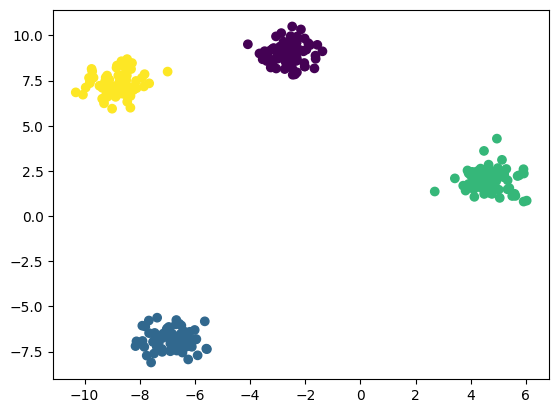

In [31]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', c=kmeans.labels_)
plt.show()

In [32]:
# Get cluster assignments
cluster_labels = kmeans.labels_
print(f"Number of points in each cluster: {[sum(cluster_labels == i) for i in range(4)]}")

Number of points in each cluster: [75, 75, 75, 75]


#### <a id='toc4_2_2_'></a>[Dimensionality Reduction](#toc0_)


These estimators reduce the number of features in the dataset while preserving important information. Examples include:

- PCA (Principal Component Analysis)
- TruncatedSVD
- TSNE


Example using PCA:


In [33]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X = digits.data

# Create and fit PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_reduced.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Original shape: (1797, 64)
Reduced shape: (1797, 2)
Explained variance ratio: [0.14890594 0.13618771]


### <a id='toc4_3_'></a>[Transformer Estimators](#toc0_)


Transformers modify or preprocess the input data. They include:


#### <a id='toc4_3_1_'></a>[Preprocessors](#toc0_)


These estimators prepare the data for modeling. Examples include:

- StandardScaler
- MinMaxScaler
- OneHotEncoder


#### <a id='toc4_3_2_'></a>[Feature Selection](#toc0_)


These estimators select the most relevant features. Examples include:

- SelectKBest
- RFE (Recursive Feature Elimination)


Example combining preprocessing and feature selection:


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a pipeline with preprocessing and feature selection
pipeline = make_pipeline(
    StandardScaler(),
    SelectKBest(f_classif, k=10)
)

# Fit and transform the data
X_processed = pipeline.fit_transform(X, y)

print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after selection: {X_processed.shape[1]}")

Original number of features: 30
Number of features after selection: 10


### <a id='toc4_4_'></a>[Meta-Estimators](#toc0_)


Meta-estimators combine or enhance other estimators. They include:

- Pipeline: Chains multiple estimators
- GridSearchCV: Performs hyperparameter tuning
- VotingClassifier: Combines multiple classifiers


Example using GridSearchCV:


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}

# Create the grid search object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.87


🤔 **Why This Matters:** Understanding the different types of estimators allows you to choose the most appropriate tool for your specific machine learning task. It also helps in constructing effective pipelines that combine various estimators for end-to-end machine learning solutions.


💡 **Pro Tip:** Experiment with different types of estimators for your problem. Sometimes, a simpler model like logistic regression might outperform more complex models, depending on your data and problem characteristics.


By familiarizing yourself with these different types of estimators, you'll be well-equipped to tackle a wide range of machine learning problems using scikit-learn. Remember that the consistency of the Estimator API across these different types makes it easy to switch between them and experiment with various approaches.

## <a id='toc5_'></a>[Summary](#toc0_)

As we conclude our exploration of the Estimator API in scikit-learn, let's recap the key points and reflect on their significance in your machine learning journey. Let's review the key points:

1. **Unified Interface:** The Estimator API provides a consistent interface across various machine learning algorithms, simplifying the learning curve and enhancing productivity.

2. **Core Components:** Understanding the core components - hyperparameters, learned parameters, methods, and attributes - is crucial for effective use of scikit-learn.

3. **Common Methods:** Mastery of common methods like `fit()`, `predict()`, `transform()`, and `score()` enables you to work with any estimator efficiently.

4. **Diverse Estimator Types:** Scikit-learn offers a wide range of estimators for supervised learning, unsupervised learning, feature manipulation, and meta-estimation.


As you continue your machine learning journey with scikit-learn, keep these points in mind:

- **Experimentation:** Don't hesitate to try different types of estimators for your problems. The consistent API makes this process much more manageable.
- **Documentation:** Always refer to the scikit-learn documentation for specific details about each estimator's unique features and parameters.
- **Best Practices:** Adhere to scikit-learn's conventions in your own custom estimators to maintain consistency and interoperability.


Build a habit of exploring new estimators in scikit-learn regularly. This will expand your toolkit and help you discover novel solutions to machine learning challenges.


The Estimator API is more than just a programming interface; it's a powerful abstraction that encapsulates the core principles of machine learning workflow. By mastering this API, you're not just learning to use a library - you're developing a structured approach to solving machine learning problems.


A deep understanding of the Estimator API empowers you to:
1. Rapidly prototype machine learning solutions
2. Create more maintainable and readable code
3. Efficiently leverage scikit-learn's extensive ecosystem of tools and models


As you apply these concepts in your projects, you'll find that the Estimator API's elegance and power significantly enhance your ability to tackle complex machine learning tasks with confidence and clarity.


❗️ **Important Note:** Remember that while the API provides a consistent interface, understanding the underlying principles of machine learning algorithms remains crucial for selecting appropriate models and interpreting results effectively.


By internalizing the principles of the Estimator API, you've laid a solid foundation for your future endeavors in machine learning with scikit-learn. Keep practicing, stay curious, and enjoy the journey of discovery in the fascinating world of machine learning!